In [46]:
# %load_ext autoreload
# %autoreload 2
%matplotlib inline

# Load the libraries we need
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpld3
import warnings

# Add wcEcoli root to the path, so we can load sim libraries
WC_ECOLI_DIRECTORY = os.path.expanduser("~/wcEcoli")
sys.path.append(WC_ECOLI_DIRECTORY)

# Load the sim libraries we need
from models.ecoli.analysis.readers.reader import Reader

# Initialise stuff
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['font.size'] = 6.0

# IPython graphing produces a bunch of warnings we don't care about
warnings.filterwarnings('ignore') 

# mpld3.enable_notebook()

In [2]:
# Fitted simulation data for the sim we're analysing
simData = "/home/acjs/wcEcoli/out/20160301.152504.128116/kb/simData_Fit_1.cPickle"

# Simulation output directory
simOut = "/home/acjs/wcEcoli/out/20160301.152504.128116/wildtype_000000/000000/generation_000000/000000/simOut/"

In [3]:
r = Reader(simData, simOut)

# Metabolism

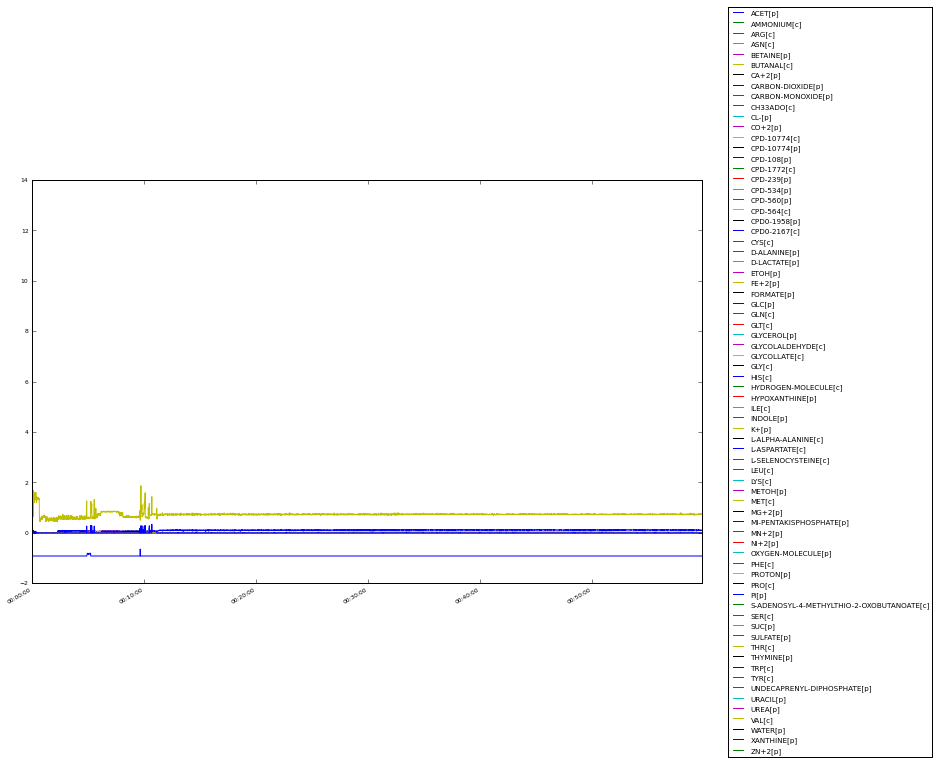

In [11]:
ax = r.fbaResults.externalExchangeFluxes.plot().legend(loc='center right', bbox_to_anchor=(1.35, 0.5))

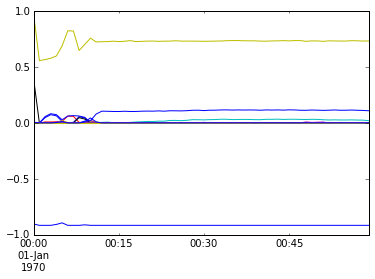

In [47]:
%matplotlib inline
mpld3.enable_notebook()
fig, ax = plt.subplots(1,1)

r.fbaResults.externalExchangeFluxes.resample('1Min').plot(ax=ax, legend=False)

for i, line in enumerate(ax.lines):
    mpld3.plugins.connect(fig, mpld3.plugins.LineLabelTooltip(line, r.fbaResults.externalExchangeFluxes.columns[i]))

In [68]:
date = r.fbaResults.externalExchangeFluxes.index[0]
date.strftime('%H:%M:%S')

'00:00:00'

array([[u'ACET[p]', u'AMMONIUM[c]', u'ARG[c]', u'ASN[c]', u'BETAINE[p]',
        u'BUTANAL[c]', u'CA+2[p]', u'CARBON-DIOXIDE[p]',
        u'CARBON-MONOXIDE[p]'],
       [u'CH33ADO[c]', u'CL-[p]', u'CO+2[p]', u'CPD-10774[c]',
        u'CPD-10774[p]', u'CPD-108[p]', u'CPD-1772[c]', u'CPD-239[p]',
        u'CPD-534[p]'],
       [u'CPD-560[p]', u'CPD-564[c]', u'CPD0-1958[p]', u'CPD0-2167[c]',
        u'CYS[c]', u'D-ALANINE[p]', u'D-LACTATE[p]', u'ETOH[p]', u'FE+2[p]'],
       [u'FORMATE[p]', u'GLC[p]', u'GLN[c]', u'GLT[c]', u'GLYCEROL[p]',
        u'GLYCOLALDEHYDE[c]', u'GLYCOLLATE[c]', u'GLY[c]', u'HIS[c]'],
       [u'HYDROGEN-MOLECULE[c]', u'HYPOXANTHINE[p]', u'ILE[c]',
        u'INDOLE[p]', u'K+[p]', u'L-ALPHA-ALANINE[c]', u'L-ASPARTATE[c]',
        u'L-SELENOCYSTEINE[c]', u'LEU[c]'],
       [u'LYS[c]', u'METOH[p]', u'MET[c]', u'MG+2[p]',
        u'MI-PENTAKISPHOSPHATE[p]', u'MN+2[p]', u'NI+2[p]',
        u'OXYGEN-MOLECULE[p]', u'PHE[c]'],
       [u'PROTON[p]', u'PRO[c]', u'Pi[p]',
    

<IPython.core.display.Javascript object>


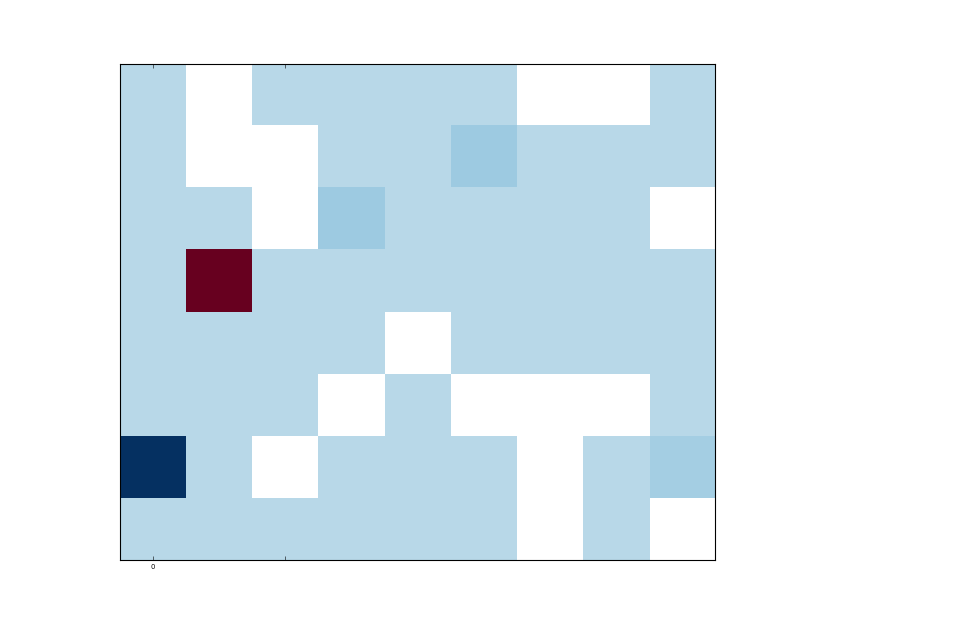

KeyboardInterrupt: 

In [97]:
%matplotlib notebook
fig, ax = plt.subplots(1,1)

data = r.fbaResults.externalExchangeFluxes.iloc[100,:].reshape(8,9)
im = ax.imshow(data, interpolation='nearest', aspect='auto', cmap='RdBu')

t = ax.annotate("00:00:00", xy=(-30,2), xycoords='axes points')

x, y = np.meshgrid(range(9), range(8))
for i, coord in enumerate(zip(x.flatten(), y.flatten())):
    label = r.fbaResults.externalExchangeFluxes.columns[i]
    if len(label) > 10:
        label = label[:10]
    ax.annotate(label, xy=coord, ha="center")
fig.canvas.draw()

fig.colorbar(im)
plt.show()
for i, row in r.fbaResults.externalExchangeFluxes.iterrows():
    im.set_data(row.reshape(8,9))
    t.set_text(i.strftime('%H:%M:%S'))
    fig.canvas.draw()